In [ ]:
# Connecting to the google drive to upload the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### ***TextBlob*** 
It is a module which is used for building programs for text analysis. One of the more powerful aspects of the TextBlob module is the Part of Speech tagging.

**Features**
* Noun phrase extraction
* Part-of-speech tagging
* Sentiment analysis
* Tokenization (splitting text into words and sentences)
* Word and phrase frequencies
* n-grams
* Word inflection (pluralization and singularization) and lemmatization
* Spelling correction .etc

**WordCloud**
* Cloud filled with lots of words in different sizes, which represent the frequency or the importance of each word. This is called Tag Cloud or WordCloud.
* A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.


In [ ]:
! pip install textblob
! pip install wordcloud
! pip install pyabsa
! pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
 # Components in spacy : tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.

import spacy.cli
spacy.cli.download("en_core_web_lg") # Downloading english spacy which has 514k keys, 514k unique vectors (300 dimensions)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# IMPORTING REQUIRED LIBRARIES

import warnings                                        # Importing warnings
warnings.filterwarnings('ignore')                      # Ignoring warnings

import pandas as pd                                    # Importing pandas library
import numpy as np                                     # Importing numpy library
import re                                             
import json 
import nltk
import string
from bs4 import BeautifulSoup                          # Beautiful Soup is a Python package for parsing HTML and XML documents.
from textblob import TextBlob                          # It is a module which is used for building programs for text analysis. 
                                                                      # One of the more powerful aspects of the TextBlob module is the Part of Speech tagging.

# importing libraries for visualization

import matplotlib.pyplot as plt                         
import seaborn as sns 

import spacy                                          # Importing spacy (spaCy is an open-source software library for advanced natural language processing .)
from spacy.lang.en.stop_words import STOP_WORDS       # Importing Stopwords
nlp= spacy.load('en_core_web_lg')                     # English pipeline optimized for CPU. Components: tok2vec, tagger, parser, 
                                                                                          # senter, ner, attribute_ruler, lemmatizer.

from IPython.display import display                   # display is a function in the IPython.display module that runs the 
                                                                                    # appropriate dunder method to get the appropriate data to display .
# from IPython.display import display
# display.set_matplotlib_formats('svg')

from collections import Counter                      # Python Counter is a container that will hold the count of each of the elements present in the container.

In [ ]:
## IMPORT DATA From Json file

vgames_review_df = pd.read_json("/content/drive/MyDrive/Project/Video_Games_5.json" ,lines=True)
toys_review_df = pd.read_json('/content/drive/MyDrive/Project/Toys_and_Games_5.json', lines=True)
vgames= vgames_review_df.copy()
toys = toys_review_df.copy()

In [ ]:
# first 2 rows
print("\n**********video Data**********\n")
display(vgames_review_df.head(2))
print("\n**********Toy Data**********\n")
display(toys_review_df.head(2))


**********video Data**********



,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4,Good rally game,1372550400,"06 30, 2013"



**********Toy Data**********



,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1VXOAVRGKGEAK,0439893577,Angie,"[0, 0]",I like the item pricing. My granddaughter want...,5,Magnetic board,1390953600,"01 29, 2014"
1,A8R62G708TSCM,0439893577,Candace,"[1, 1]",Love the magnet easel... great for moving to d...,4,it works pretty good for moving to different a...,1395964800,"03 28, 2014"



#### Column names and their meanings
* reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
* asin - ID of the product, e.g. 0000013714
* reviewerName - name of the reviewer
* helpful - helpfulness rating of the review, e.g. 2/3
* reviewText - text of the review
* overall - rating of the product
* summary - summary of the review
* unixReviewTime - time of the review (unix time)
* reviewTime - time of the review

In [ ]:
# informartion about the data

print("\n**********video Data**********\n")
display(vgames_review_df.info())
print("\n**********Toy Data**********\n")
display(toys_review_df.info())


**********video Data**********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231780 entries, 0 to 231779
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      231780 non-null  object
 1   asin            231780 non-null  object
 2   reviewerName    228967 non-null  object
 3   helpful         231780 non-null  object
 4   reviewText      231780 non-null  object
 5   overall         231780 non-null  int64 
 6   summary         231780 non-null  object
 7   unixReviewTime  231780 non-null  int64 
 8   reviewTime      231780 non-null  object
dtypes: int64(2), object(7)
memory usage: 15.9+ MB


None


**********Toy Data**********

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167597 entries, 0 to 167596
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      167597 non-null  object
 1   asin            167597 non-null  object
 2   reviewerName    166759 non-null  object
 3   helpful         167597 non-null  object
 4   reviewText      167597 non-null  object
 5   overall         167597 non-null  int64 
 6   summary         167597 non-null  object
 7   unixReviewTime  167597 non-null  int64 
 8   reviewTime      167597 non-null  object
dtypes: int64(2), object(7)
memory usage: 11.5+ MB


None

In [ ]:
# shape of the datas
print("Shape of the video_data data = ",vgames_review_df.shape)
print("\nShape of the toy_data data = ",toys_review_df.shape)

Shape of the video_data data =  (231780, 9)

Shape of the toy_data data =  (167597, 9)


In [ ]:
# describe about the data

print("\n**********video Data**********\n")
display(vgames_review_df.describe().T)
print("\n**********Toy Data**********\n")
display(toys_review_df.describe().T)


**********video Data**********



,count,mean,std,min,25%,50%,75%,max
overall,231780.0,4.086397e+00,1.202330e+00,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
unixReviewTime,231780.0,1.277217e+09,1.155784e+08,939859200.0,1.212970e+09,1.317773e+09,1.368490e+09,1.405987e+09



**********Toy Data**********



,count,mean,std,min,25%,50%,75%,max
overall,167597.0,4.356307e+00,9.935013e-01,1.0,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
unixReviewTime,167597.0,1.348759e+09,6.089581e+07,964742400.0,1.335917e+09,1.364429e+09,1.388016e+09,1.406074e+09


In [ ]:
# describe the object columns

print("\n**********video Data**********\n")
display(vgames_review_df.describe(include='object'))
print("\n**********Toy Data**********\n")
display(toys_review_df.describe(include='object'))


**********video Data**********



,reviewerID,asin,reviewerName,helpful,reviewText,summary,reviewTime
count,231780,231780,228967,231780,231780,231780,231780
unique,24303,10672,22349,4277,231674,187867,5302
top,A3V6Z4RCDGRC44,B00BGA9WK2,Amazon Customer,"[0, 0]",,Great game,"11 22, 2013"
freq,773,802,1862,91925,44,1066,422



**********Toy Data**********



,reviewerID,asin,reviewerName,helpful,reviewText,summary,reviewTime
count,167597,167597,166759,167597,167597,167597,167597
unique,19412,11924,17693,1506,167490,126788,4119
top,AJGU56YG8G1DQ,B004S8F7QM,Amazon Customer,"[0, 0]",,Cute,"12 26, 2013"
freq,550,309,2268,104720,93,558,887


#### Data Preprocessing

Text Preprocessing


Text normalization is defined as a process that consists of a series of steps that should be followed to  clean, and standardize textual data into a form that could be consumed by other NLP and analytics systems and applications as input. Besides tokenization, various other techniques include cleaning text,removing stopwords and other unnecessary terms, stemming, and lemmatization.



In [ ]:
# DEFINING FUNCTION FOR DATA CHECK

def datacheck(text):
    print ("================================================")
    # change column name 
    text = text.rename(columns={'overall': 'Rating'}) # changing column name

    print ("Total dataset:", str(text.shape))
    print()
    
    ### Total reviews
    total = len(text)
    print ("Number of reviews: ",total)
    print ()

    ### How many unique reviewers?
    print ("Number of unique reviewers: ",len(text.reviewerID.unique()))
    reviewer_prop = float(len(text.reviewerID.unique())/total)
    print ("Prop of unique reviewers: ",round(reviewer_prop,3))
    print ()

    ### How many unique products? (asin = Product _Id)
    print ("Number of unique products: ", len(text.asin.unique()))
    product_prop = float(len(text.asin.unique())/total)
    print ("Prop of unique products: ",round(product_prop,3))
    print ()

    ### Average star score
    print ("Average rating score: ",round(text.Rating.mean(),3))

    print ("================================================")
    print()
    return text.head()

In [ ]:
# check whehter it's having null values or not
## dropping a unwanted columns

def null(text):
    print(text.isnull().sum())
    text.drop(text.columns[[ 3, 7]], axis = 1, inplace = True)  # removing unwanted columns
    text['reviewTime']=pd.to_datetime(text['reviewTime'])   # converting to the date time format of review time column
    text['Reviews_orignal'] =text['reviewText'].copy()
    text['reviewText + summary'] = text['reviewText']+" "+text["summary"]    # merging review text & summary to get single output
    #text.drop(text.columns[4], axis = 1, inplace = True)  # removing summary columns

In [ ]:
# DEFINING FUNCTION FOR DATA CLEANING

def clean_text(text):
    text = text.str.lower()  # lowering the case!
    text = text.apply(lambda x: re.sub('[^a-z A-Z 0-9-]+', '', x))  # it removes the punctuation 
    text = text.apply(lambda x: " ".join([i for i in x.split() if i not in STOP_WORDS]) )  # remove stopwords!
    text = text.apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , str(x))) 
    # remove url and tags! 
    text = text.apply(lambda x: BeautifulSoup(x, 'lxml').get_text())  #remove html tags!
    text = text.apply(lambda x: re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', '', x))  # it will remove te emails 
    text = text.apply(lambda x: " ".join(x.split())) # remove extra spaces
    
    return text

In [ ]:
# DEFINING FUNCTION FOR POLARITY 

def getpolarity(text):
    return TextBlob(text).sentiment.polarity
    

In [ ]:
# DEFINING FUNCTION FOR SENTIMENT ANALYSIS 

def getanalysis(score):
    if score < 0:
        return "Negative"
    elif score > 0.5:
        return "Highly Positive"
    elif score < 0.6 and score > 0 :
        return "Positive"
    else:
        return "Neutral"
        

### **Part 1**
**Sentiment analysis**

#### Toys and games Dataset 

In [ ]:
# CHECK DATA IN PANDAS (toy data)

datacheck(toys_review_df)

Total dataset: (167597, 9)

Number of reviews:  167597

Number of unique reviewers:  19412
Prop of unique reviewers:  0.116

Number of unique products:  11924
Prop of unique products:  0.071

Average rating score:  4.356



,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime
0,A1VXOAVRGKGEAK,0439893577,Angie,"[0, 0]",I like the item pricing. My granddaughter want...,5,Magnetic board,1390953600,"01 29, 2014"
1,A8R62G708TSCM,0439893577,Candace,"[1, 1]",Love the magnet easel... great for moving to d...,4,it works pretty good for moving to different a...,1395964800,"03 28, 2014"
2,A21KH420DK0ICA,0439893577,capemaychristy,"[1, 1]",Both sides are magnetic. A real plus when you...,5,love this!,1359331200,"01 28, 2013"
3,AR29QK6HPFYZ4,0439893577,dcrm,"[0, 0]",Bought one a few years ago for my daughter and...,5,Daughters love it,1391817600,"02 8, 2014"
4,ACCH8EOML6FN5,0439893577,DoyZ,"[1, 1]",I have a stainless steel refrigerator therefor...,4,Great to have so he can play with his alphabet...,1399248000,"05 5, 2014"


In [ ]:
#CHECK FOR NULL VALUES AND DROPPING UNWANTED COLUMNS
null(toys_review_df)

reviewerID          0
asin                0
reviewerName      838
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64


In [ ]:
# removing null valued  rows
toys_review_df.dropna(inplace=True)

In [ ]:
# CALLING CLEAN_TEXT FUNCTION (Cleaning the texts)

toys_review_df["reviewText"]=clean_text(toys_review_df["reviewText"])
print("The final dataset of Toys and Games are after data preprocessing : ")
print()
toys_review_df.head()

The final dataset of Toys and Games are after data preprocessing : 



,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary
0,A1VXOAVRGKGEAK,0439893577,Angie,like item pricing granddaughter wanted mark wa...,5,Magnetic board,2014-01-29,I like the item pricing. My granddaughter want...,I like the item pricing. My granddaughter want...
1,A8R62G708TSCM,0439893577,Candace,love magnet easel great moving different areas...,4,it works pretty good for moving to different a...,2014-03-28,Love the magnet easel... great for moving to d...,Love the magnet easel... great for moving to d...
2,A21KH420DK0ICA,0439893577,capemaychristy,sides magnetic real plus youre entertaining ch...,5,love this!,2013-01-28,Both sides are magnetic. A real plus when you...,Both sides are magnetic. A real plus when you...
3,AR29QK6HPFYZ4,0439893577,dcrm,bought years ago daughter loves today holidays...,5,Daughters love it,2014-02-08,Bought one a few years ago for my daughter and...,Bought one a few years ago for my daughter and...
4,ACCH8EOML6FN5,0439893577,DoyZ,stainless steel refrigerator space son play ma...,4,Great to have so he can play with his alphabet...,2014-05-05,I have a stainless steel refrigerator therefor...,I have a stainless steel refrigerator therefor...


In [ ]:
%%time

# APPLYING POLARITY SCORES WITH RESPECT TO REVIEWS 
#(from the polarity score we can see that how much the data is range between -1 to +1)

toys_review_df["reviewPolarity"] = toys_review_df["reviewText"].apply(getpolarity)

# CATEGORISING SENTIMENTS ACCORDING TO POLARITY SCORES

toys_review_df["reviewAnalysis"] =toys_review_df["reviewPolarity"].apply(getanalysis)
# Review analysis(sentiment) based on polarity of the text

print("Here the Sentiment analysis of each review : ")
print()
toys_review_df.head()

Here the Sentiment analysis of each review : 

CPU times: user 55.3 s, sys: 144 ms, total: 55.5 s
Wall time: 56.6 s


,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,A1VXOAVRGKGEAK,0439893577,Angie,like item pricing granddaughter wanted mark wa...,5,Magnetic board,2014-01-29,I like the item pricing. My granddaughter want...,I like the item pricing. My granddaughter want...,0.000000,Neutral
1,A8R62G708TSCM,0439893577,Candace,love magnet easel great moving different areas...,4,it works pretty good for moving to different a...,2014-03-28,Love the magnet easel... great for moving to d...,Love the magnet easel... great for moving to d...,0.433333,Positive
2,A21KH420DK0ICA,0439893577,capemaychristy,sides magnetic real plus youre entertaining ch...,5,love this!,2013-01-28,Both sides are magnetic. A real plus when you...,Both sides are magnetic. A real plus when you...,0.300000,Positive
3,AR29QK6HPFYZ4,0439893577,dcrm,bought years ago daughter loves today holidays...,5,Daughters love it,2014-02-08,Bought one a few years ago for my daughter and...,Bought one a few years ago for my daughter and...,0.700000,Highly Positive
4,ACCH8EOML6FN5,0439893577,DoyZ,stainless steel refrigerator space son play ma...,4,Great to have so he can play with his alphabet...,2014-05-05,I have a stainless steel refrigerator therefor...,I have a stainless steel refrigerator therefor...,0.500000,Positive


In [ ]:
# to save file into csv

#toys_review_df.to_csv("/content/drive/MyDrive/Project//eda_toy1.csv",sep=",")

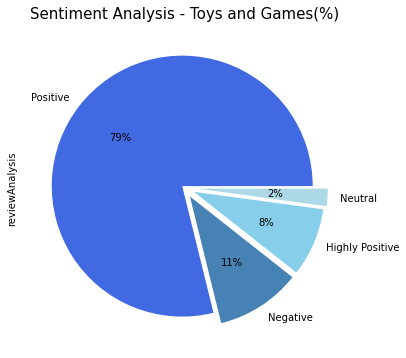

In [ ]:
# Plot the count of sentiment in pie chart

plt.figure(figsize=(10,6))
toys_review_df["reviewAnalysis"].value_counts().plot(kind="pie", explode=(0.02,0.08,0.08,0.1),autopct='%1.f%%', colors=("royalblue","steelblue","skyblue", "lightblue")) 
plt.title("Sentiment Analysis - Toys and Games(%)", fontsize=15)
plt.show()

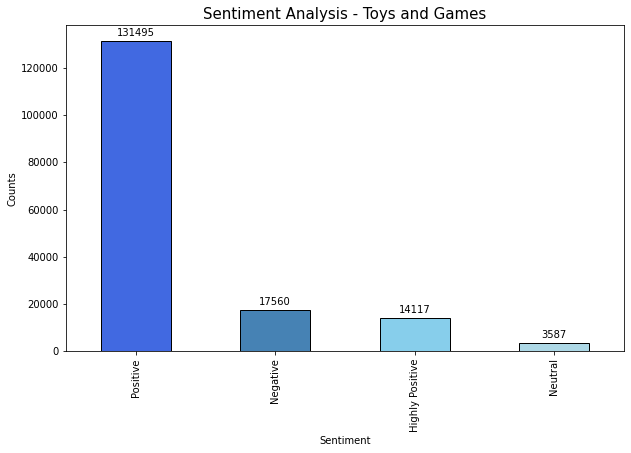

In [ ]:
# Plot the count of sentiment in bir chart

plt.bar
plt.figure(figsize=(10,6))
ax = toys_review_df["reviewAnalysis"].value_counts().plot(kind="bar", color=["royalblue","steelblue","skyblue", "lightblue"],edgecolor="black")
for bar in ax.patches:
    ax.annotate(format(bar.get_height()),(bar.get_x() + bar.get_width() / 2,bar.get_height()), 
                ha='center', va='center',xytext=(0, 8),textcoords='offset points')

# xytext : The position (x, y) to place the text at. The coordinate system is determined by textcoords.
# textcoords = 'offset points' : Offset (in points) from the xy value

plt.title("Sentiment Analysis - Toys and Games", fontsize=15)
plt.xlabel("Sentiment")
plt.ylabel("Counts")
plt.show()

We can see that maximum rewiews are positive in Toy Games Data.

In [ ]:
%%time
# Printing the sentiment with respect to their review text.

toys_review_df_sample = toys_review_df.sample(n=10, random_state=42)   #taking samples from the model to visually check the accuracy

for i in range(0,10):
    print("Review : ",toys_review_df_sample["reviewText"].iloc[i])
    print("Sentiment : ",toys_review_df_sample["reviewAnalysis"].iloc[i] )
    print("---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")

Review :  great interactive questions read hundreds times perfect dinosaur loving kid sure scientifically accurate point dont care- helping capture attention motivating read
Sentiment :  Highly Positive
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Review :  hello sunshine recommended friend toddlers playgroup hit home wour 2 year old little girl loves looking sunshine tables furniture great game teach positional concepts kids like lot
Sentiment :  Positive
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Review :  tried vinefun 2 took awhile girlfriend mold bricks crayola version play-doh pretty terrible opinion times couldnt tap morphix mold youd ball try pull took awhile finally rolled gunk vague structures catapults kind fun 

**Finding the reason of negative reviews for product highest number of negative reviews**

In [ ]:
print("In toy data the review id which gives highest Positive reviews :",toys_review_df[(toys_review_df["reviewAnalysis"]=="Positive")]["asin"].mode().values)
print("\nIn toy data the number of review id which gives highest Positive reviews :",toys_review_df[(toys_review_df["reviewAnalysis"]=="Positive")]["reviewerID"].count())
print("\nIn toy data the review id which gives highest Negative reviews :",toys_review_df[(toys_review_df["reviewAnalysis"]=="Negative")]["asin"].mode().values)
print("\nIn toy data the number of review id which gives highest Negative reviews :",toys_review_df[(toys_review_df["reviewAnalysis"]=="Negative")]["reviewerID"].count())

In toy data the review id which gives highest Positive reviews : ['B0089RPUHO']

In toy data the number of review id which gives highest Positive reviews : 131495

In toy data the review id which gives highest Negative reviews : ['B004S8F7QM']

In toy data the number of review id which gives highest Negative reviews : 17560


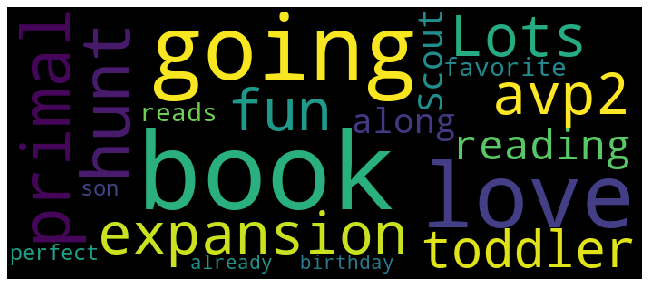

In [ ]:
# Word cloud for Positive and particular product id (for few commends)

op=["primal hunt is the expansion to avp2 which is ...", "Lots of fun. Our toddler loves reading along with these books. Scout is a favorite book and he reads it over and over. ", "This is going to be perfect for my son on his birthday. He already has a love for books and he is going to be."]
from wordcloud import WordCloud
plt.figure(figsize=(19,5))
allwords = ' '.join(op)
word= WordCloud(width = 700, height = 300, random_state =21, max_font_size = 119, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()

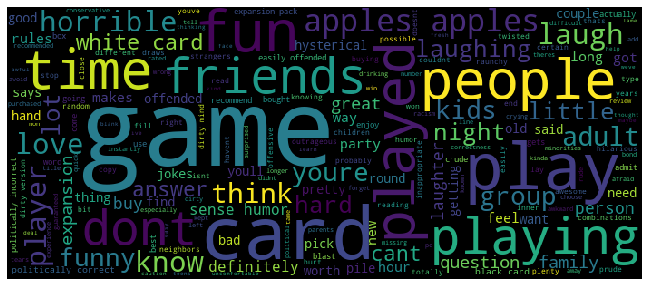

In [ ]:
# For all comments (neg reviews)

negative_df=toys_review_df[(toys_review_df["reviewAnalysis"]=="Negative") & (toys_review_df["asin"]=="B004S8F7QM")]

from wordcloud import WordCloud
plt.figure(figsize=(19,5))
allwords = ' '.join([i for i in negative_df.reviewText])
word= WordCloud(width = 700, height = 300, random_state =21, max_font_size = 119, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()

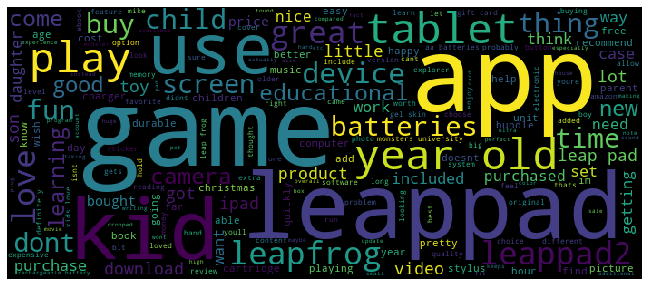

In [ ]:
# Word cloud for Positive and particular product id

Positive_df=toys_review_df[(toys_review_df["reviewAnalysis"]=="Positive") & (toys_review_df["asin"]=="B0089RPUHO")]

from wordcloud import WordCloud
plt.figure(figsize=(19,5))
allwords = ' '.join([i for i in Positive_df.reviewText])
word= WordCloud(width = 700, height = 300, random_state =21, max_font_size = 119, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()

#### Video games Dataset

In [ ]:
# CHECKING THE DATA 

datacheck(vgames_review_df)

Total dataset: (231780, 9)

Number of reviews:  231780

Number of unique reviewers:  24303
Prop of unique reviewers:  0.105

Number of unique products:  10672
Prop of unique products:  0.046

Average rating score:  4.086



,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4,Good rally game,1372550400,"06 30, 2013"
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1,Wrong key,1403913600,"06 28, 2014"
3,A1DLMTOTHQ4AST,0700099867,ampgreen,"[7, 10]","I got this version instead of the PS3 version,...",3,"awesome game, if it did not crash frequently !!",1315958400,"09 14, 2011"
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4,DIRT 3,1308009600,"06 14, 2011"


In [ ]:
# CHECK FOR NULL VALUES AND DROPPING UNWANTED COLUMNS
null(vgames_review_df)

reviewerID           0
asin                 0
reviewerName      2813
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64


In [ ]:
# removing null valued  rows
vgames_review_df.dropna(inplace=True)

In [ ]:
# cleaning the reviews

vgames_review_df["reviewText"] = clean_text(vgames_review_df["reviewText"])

print("The final dataset of Video Games are after data preprocessing : ")
print()
vgames_review_df.head()


The final dataset of Video Games are after data preprocessing : 



,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary
0,A2HD75EMZR8QLN,0700099867,123,installing game struggle games windows live bu...,1,Pay to unlock content? I don't think so.,2012-07-09,Installing the game was a struggle (because of...,Installing the game was a struggle (because of...
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""",like rally cars game funit oriented 34european...,4,Good rally game,2013-06-30,If you like rally cars get this game you will ...,If you like rally cars get this game you will ...
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""",1st shipment received book instead game2nd shi...,1,Wrong key,2014-06-28,1st shipment received a book instead of the ga...,1st shipment received a book instead of the ga...
3,A1DLMTOTHQ4AST,0700099867,ampgreen,got version instead ps3 version turned mistake...,3,"awesome game, if it did not crash frequently !!",2011-09-14,"I got this version instead of the PS3 version,...","I got this version instead of the PS3 version,..."
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""",dirt 2 xbox 360 okay game started playing game...,4,DIRT 3,2011-06-14,I had Dirt 2 on Xbox 360 and it was an okay ga...,I had Dirt 2 on Xbox 360 and it was an okay ga...


In [ ]:
# APPLYING POLARITY SCORES WITH RESPECT TO REVIEW TEXTS .(video data)
# from the polarity score we can see that how much the data is range between -1 to +1.

vgames_review_df["reviewPolarity"] = vgames_review_df["reviewText"].apply(getpolarity)

#CATEGORISING SENTIMENTS ACCORDING TO POLARITY SCORES

vgames_review_df["reviewAnalysis"] =vgames_review_df["reviewPolarity"].apply(getanalysis)
vgames_review_df.head()

,reviewerID,asin,reviewerName,reviewText,overall,summary,reviewTime,Reviews_orignal,reviewText + summary,reviewPolarity,reviewAnalysis
0,A2HD75EMZR8QLN,0700099867,123,installing game struggle games windows live bu...,1,Pay to unlock content? I don't think so.,2012-07-09,Installing the game was a struggle (because of...,Installing the game was a struggle (because of...,-0.062727,Negative
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""",like rally cars game funit oriented 34european...,4,Good rally game,2013-06-30,If you like rally cars get this game you will ...,If you like rally cars get this game you will ...,0.183333,Positive
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""",1st shipment received book instead game2nd shi...,1,Wrong key,2014-06-28,1st shipment received a book instead of the ga...,1st shipment received a book instead of the ga...,-0.200000,Negative
3,A1DLMTOTHQ4AST,0700099867,ampgreen,got version instead ps3 version turned mistake...,3,"awesome game, if it did not crash frequently !!",2011-09-14,"I got this version instead of the PS3 version,...","I got this version instead of the PS3 version,...",-0.021147,Negative
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""",dirt 2 xbox 360 okay game started playing game...,4,DIRT 3,2011-06-14,I had Dirt 2 on Xbox 360 and it was an okay ga...,I had Dirt 2 on Xbox 360 and it was an okay ga...,0.233766,Positive


In [ ]:
# to save file into csv

#vgames_review_df.to_csv("/content/drive/MyDrive/Project//eda_video1.csv",sep=",")

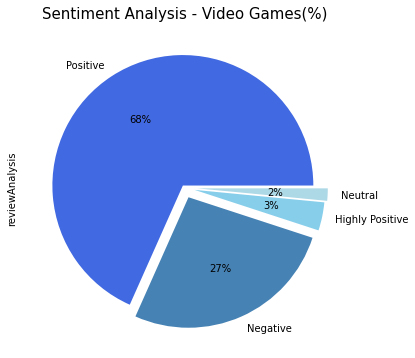

In [ ]:
#PLOT THE COUNTS OF SENTIMENTS

plt.figure(figsize=(10,6))
vgames_review_df["reviewAnalysis"].value_counts().plot(kind="pie", explode=(0.02,0.08,0.08,0.1),autopct='%1.f%%', colors=("royalblue","steelblue","skyblue", "lightblue")) 
plt.title("Sentiment Analysis - Video Games(%)", fontsize=15)
plt.show()

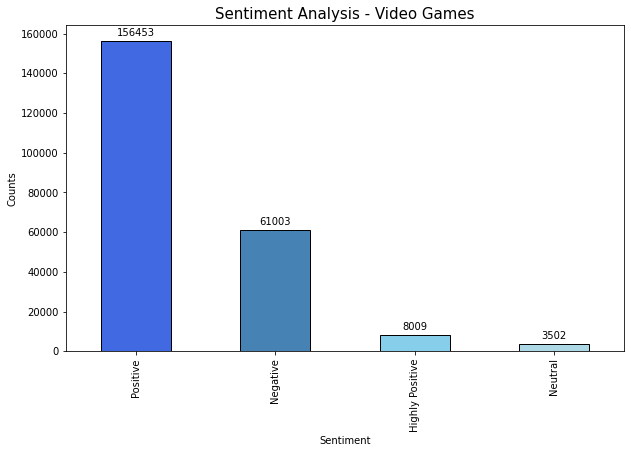

In [ ]:
#PLOT THE COUNTS OF SENTIMENTS
plt.bar
plt.figure(figsize=(10,6))
ax = vgames_review_df["reviewAnalysis"].value_counts().plot(kind="bar", color=["royalblue","steelblue","skyblue", "lightblue"],edgecolor="black")
for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center', xytext=(0, 8),
                   textcoords='offset points')

plt.title("Sentiment Analysis - Video Games", fontsize=15)
plt.xlabel("Sentiment")
plt.ylabel("Counts")
plt.show()

In [ ]:
# Printing the sentiment with respect to their review text.

vgames_review_df_sample = vgames_review_df.sample(n=10, random_state=21)  

for i in range(0,10):
    print("Review : ",vgames_review_df_sample["reviewText"].iloc[i])
    print("Sentiment : ",vgames_review_df_sample["reviewAnalysis"].iloc[i] )
    print("-----------")

Review :  darkside chronicles good umbrella chronicles1 graphics superior satisfying sound scoring critical hit isnt satisfying umbrella chronicles2 control weapon selection easier grenades arent fluid select use button instead nunchuck baffling abandon fun effective motion controls3 explosive weapons particularly grenades grenade launchers useless splash damage pathetically implemented4the camera dear christ camera whichever developers thought good idea camera environment like caffeine addled year old needs shot5 obsession creating cinematic experience fills gameplay frustration example good reason whatsoever bosses invulnerable gunfire health bar displayed good luck figuring cause chances youll dump hundreds rounds fruitlessly carcassthe cinematic experience ruins boss battles emptying health bar isnt follow ridiculous scripting events oh yeah health bar drained kill frustrating words fight boss lose despite reducing hp 0 didnt properly perform arbitrary scripted sequence annoying ma

**Finding the reason of negative reviews for product highest number of Positive Negative reviews**

In [ ]:
print("In video data the review id which gives highest Positive reviews :",vgames_review_df[(vgames_review_df["reviewAnalysis"]=="Positive")]["asin"].mode().values)
print("\nIn video data the number of review id which gives highest Positive reviews :",vgames_review_df[(vgames_review_df["reviewAnalysis"]=="Positive")]["reviewerID"].count())
print("\nIn video data the review id which gives highest Negative reviews :",vgames_review_df[(vgames_review_df["reviewAnalysis"]=="Negative")]["asin"].mode().values)
print("\nIn video data the number of review id which gives highest Negative reviews :",vgames_review_df[(vgames_review_df["reviewAnalysis"]=="Negative")]["reviewerID"].count())

In video data the review id which gives highest Positive reviews : ['B00BGA9WK2']

In video data the number of review id which gives highest Positive reviews : 156453

In video data the review id which gives highest Negative reviews : ['B00178630A']

In video data the number of review id which gives highest Negative reviews : 61003


Product Id "B00178630A" have highest Negative Reviews .

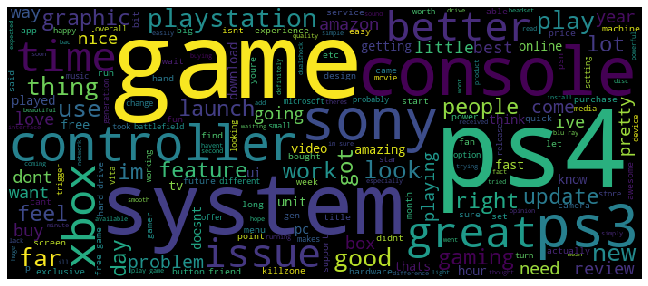

In [ ]:
# for positive seentiment and paricular product

Positive_df=vgames_review_df[(vgames_review_df["reviewAnalysis"]=="Positive") & (vgames_review_df["asin"]=="B00BGA9WK2")]

from wordcloud import WordCloud
plt.figure(figsize=(19,5))
allwords = ' '.join([i for i in Positive_df.reviewText])
word= WordCloud(width = 700, height = 300, random_state =21, max_font_size = 119, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()

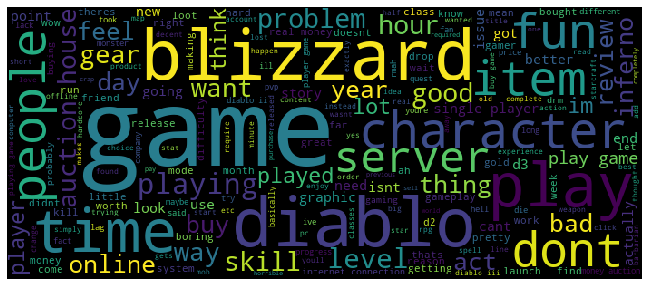

In [ ]:
# For all comments (neg reviews)

negative_df=vgames_review_df[(vgames_review_df["reviewAnalysis"]=="Negative") & (vgames_review_df["asin"]=="B00178630A")]

from wordcloud import WordCloud
plt.figure(figsize=(19,5))
allwords = ' '.join([i for i in negative_df.reviewText])
word= WordCloud(width = 700, height = 300, random_state =21, max_font_size = 119, background_color='black').generate(allwords)

plt.imshow(word, interpolation = "none")
plt.axis("off")
plt.show()

### **Part 2**
**Finding The Product Names**

**FINDING PRODUCT NAMES**

###### Toy Data

In [ ]:
from collections import Counter 

l = toys_review_df[(toys_review_df["asin"]=="B0089RPUHO")]

product_names = []
reviews = []
c=1
for j in l.reviewText.unique():
    reviews.append(j)
    product=[]
    count=[]
    d=l[l['reviewText']==j]['reviewText + summary']
    for i in d :
        dat= nlp(i)
        for w in dat.ents:
            if w.label_=='PRODUCT':
              count.append(w.text)
                     
    if count==[]:
      pass
    else:
      a=Counter(count).most_common(1)[:1][0][0]
      product_names.append(a)
    
    c+=1

In [ ]:
print( "   Product Names")
print("   ============= " )
t = pd.DataFrame({"Product Name" :product_names})
for i in range(len(t)):
  print(i ,":",t["Product Name"][i])

   Product Names
0 : iPhone 3Gs
1 : Reviews
2 : Leap Pad
3 : Explorer
4 : Ultra
5 : Leap Frog
6 : Leap Pad
7 : a LeapPad 2
8 : Leap Pad
9 : iPod
10 : App
11 : The Gel Skin
12 : Kindle
13 : Explorers
14 : Leap Frog
15 : Ultra
16 : Ultra
17 : iPads/Kindles/Nooks
18 : Ultra
19 : Leap Pad 2
20 : Explorer
21 : the LeapPad 2
22 : Explorer
23 : Galaxy
24 : Leap Pad 2
25 : iPod Touch
26 : iPad
27 : iPad
28 : iPads
29 : Kindle Fire
30 : Ped Pad1
31 : Leap Pad 2
32 : Leap Pad 2
33 : Nintendo 3ds
34 : iPads
35 : Leap Pad 2
36 : iPad
37 : a Gel Skin Monsters U.
38 : Fire HD
39 : Leap Frog
40 : a Gel Skin
41 : LeapPAD2
42 : App
43 : Leap
44 : this Leap Pad
45 : toybox
46 : Kindle
47 : iPod
48 : Leap Pad 2
49 : the Leap Pads
50 : Leap Pad 2
51 : iPad
52 : iTunes
53 : DS
54 : Leap


EXTRACTING PRODUCT NAMES FROM TEXT IN DATASET (TOYS AND GAMES)

In [ ]:
%%time
#USING NER MEHTOD TO FETCHED OUT THE PRODUCT NAME (toy_Data)

prd_id=[]
product_name=[]
c=1
for j in toys_review_df.asin.unique()[60:90]:
    
    product=[]
    count=[]
    d=toys_review_df[toys_review_df['asin']==j]['reviewText + summary']
    for i in d :
        dat= nlp(i)
        for w in dat.ents:
            if w.label_=='PRODUCT':
              count.append(w.text)
          
    if count==[]:
      pass
    else:
      a=Counter(count).most_common(1)[:1][0][0]
      product_name.append(a)
      prd_id.append(j)
    
    c+=1 

CPU times: user 11.8 s, sys: 92.9 ms, total: 11.9 s
Wall time: 11.9 s


In [ ]:
print("   Product_Id " ,"  -- ", "Product Name")
print("=============== " ,"-- ", "===============")
t = pd.DataFrame({"Product_ID" :prd_id,"Product Name" :product_name})
for i in range(len(t)):
  print(i ,":",t["Product_ID"][i],"--",t["Product Name"][i])

   Product_Id    --  Product Name
===============  --  ===============
0 : 1581178816 -- Little Hands Love
1 : 158978068X -- Fluxx
2 : 1589780817 -- Fluxx
3 : 1589781066 -- Fluxx
4 : 1589781244 -- Cthulhu
5 : 1589781317 -- Magic the Gathering
6 : 158994030X -- Warlord
7 : 158994206X -- Twilight Imperium 3rd Edition
8 : 1589942108 -- Cthulhu
9 : 158994223X -- Excel
10 : 1589942841 -- Madness
11 : 1589942981 -- Fantasy Flight
12 : 1589944208 -- Magic
13 : 1589944348 -- Gnome
14 : 1589944607 -- Battlestar Galactica
15 : 1589944623 -- Talisman
16 : 1589944968 -- Cosmic Encounter
17 : 1589946464 -- addition.-New
18 : 1589946634 -- Fantasy Flight
19 : 158994691X -- Talisman
20 : 1589947061 -- Fantasy Flight
21 : 1589947207 -- Tides of War
22 : 1589949811 -- Magic
23 : 1594721270 -- CCGs


###### Video Data

EXTRACTING PRODUCT NAMES FROM TEXT IN DATASET (Video GAMES)

In [ ]:
%%time
#USING NER MEHTOD TO FETCHED OUT THE PRODUCT NAME 

prd_id=[]
product_name=[]
c=1
for j in vgames_review_df.asin.unique()[40:60]:
    prd_id.append(j)
    #print('Product',str(c),':',j)
    #print('-'*40)
    product=[]
    count=[]
    d=vgames_review_df[vgames_review_df['asin']==j]['reviewText + summary']
    for i in d :
        dat= nlp(i)
        for w in dat.ents:
            if w.label_=='PRODUCT':
              count.append(w.text)
          
    if count==[]:
      pass
    else:
      a=Counter(count).most_common(1)[:1][0][0]
      product_name.append(a)
    
    c+=1
    #print('*'*40)

print("Here are the list of first 20 Product_ID and their respective product names : ")  
vgames_product_names=pd.DataFrame()
vgames_product_names["Product_ID"]=prd_id
vgames_product_names["Product Name"]= product_name
vgames_product_names.head(20)

Here are the list of first 20 Product_ID and their respective product names : 
CPU times: user 23.6 s, sys: 146 ms, total: 23.8 s
Wall time: 23.8 s


,Product_ID,Product Name
0,B00000DMB3,Zelda
1,B00000DMB4,Tomb Raider
2,B00000DMB5,N64
3,B00000DMB6,Playstation
4,B00000DMB9,Attitude
5,B00000F1GI,Tomb Raider 3
6,B00000F1GM,Nintendo
7,B00000G16I,Nintendo
8,B00000I1B7,YouTube
9,B00000I1B8,Scorpion
